In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("Kaggle_Salary.csv", encoding = "ISO-8859-1") 

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(15430, 397)

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15420,15421,15422,15423,15424,15425,15426,15427,15428,15429
Unnamed: 0,0,2,3,5,7,8,10,12,13,14,...,23833,23836,23839,23841,23842,23844,23845,23854,23855,23857
Time from Start to Finish (seconds),Duration (in seconds),434,718,731,959,1758,751,823,1091,1917,...,1804,1536,180,699,539,1800,129,348,575,370
Q1,What is your gender? - Selected Choice,Male,Female,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Female,Male,Male,Male,Male,Male,Male
Q1_OTHER_TEXT,What is your gender? - Prefer to self-describe...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Q2,What is your age (# years)?,30-34,30-34,22-24,35-39,18-21,30-34,40-44,25-29,25-29,...,18-21,25-29,22-24,22-24,18-21,30-34,22-24,30-34,45-49,22-24
Q3,In which country do you currently reside?,Indonesia,United States of America,India,Chile,India,Hungary,United States of America,France,United States of America,...,Turkey,Russia,Turkey,India,Russia,Netherlands,Romania,Turkey,France,Turkey
Q4,What is the highest level of formal education ...,Bachelorâs degree,Masterâs degree,Masterâs degree,Doctoral degree,Masterâs degree,Masterâs degree,Masterâs degree,Doctoral degree,Bachelorâs degree,...,Bachelorâs degree,Masterâs degree,Bachelorâs degree,Masterâs degree,Masterâs degree,Masterâs degree,Masterâs degree,Doctoral degree,Doctoral degree,Masterâs degree
Q5,Which best describes your undergraduate major?...,Engineering (non-computer focused),"Computer science (software engineering, etc.)",Mathematics or statistics,"Information technology, networking, or system ...","Information technology, networking, or system ...",Engineering (non-computer focused),Engineering (non-computer focused),Mathematics or statistics,Mathematics or statistics,...,Mathematics or statistics,"Computer science (software engineering, etc.)","A business discipline (accounting, economics, ...","Information technology, networking, or system ...","Computer science (software engineering, etc.)","Computer science (software engineering, etc.)",Mathematics or statistics,"Computer science (software engineering, etc.)","Computer science (software engineering, etc.)","Computer science (software engineering, etc.)"
Q6,Select the title most similar to your current ...,Other,Data Scientist,Data Analyst,Other,Other,Software Engineer,Data Scientist,Student,Research Assistant,...,Data Engineer,Product/Project Manager,Data Analyst,Student,Student,Software Engineer,Student,Research Assistant,Chief Officer,Software Engineer
Q6_OTHER_TEXT,Select the title most similar to your current ...,0,-1,-1,1,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
df=df[1:]

In [6]:
new_cols=["index","time","gender","age","country","deg","major","jobrole","employer","exp","sal","ml"]
df.rename(columns=dict(zip(df.columns[[0,1,2,4,5,6,7,8,10,12,13,14]], new_cols)),inplace=True)

In [7]:
df.head(2).T

,1,2
index,2,3
time,434,718
gender,Male,Female
Q1_OTHER_TEXT,-1,-1
age,30-34,30-34
country,Indonesia,United States of America
deg,Bachelorâs degree,Masterâs degree
major,Engineering (non-computer focused),"Computer science (software engineering, etc.)"
jobrole,Other,Data Scientist
Q6_OTHER_TEXT,0,-1


In [8]:
df = df[pd.notnull(df['sal'])]
df = df[~df.sal.isin(['I do not wish to disclose my approximate yearly compensation','500,000+'])]
df = df[df.jobrole!= 'Student']
df = df[df.employer != 'I am a student']
df['country'] = df['country'].str.replace('(\(|,| or | and | of ).+$','', regex=True)
df['deg'] = df['deg'].str.replace('(/).+$','', regex=True)
df['major'] = df['major'].str.replace('(\(|,| or | and | of ).+$','', regex=True)

In [9]:
ages=df['age']


In [10]:
df.drop(['age'],axis=1,inplace=True)

In [11]:
df['deg']=df['deg'].str.replace(u"â","")

In [12]:
df = df.replace('[^\w\s]','',regex=True)


In [13]:
df['age']=ages

In [14]:
df

,index,time,gender,Q1_OTHER_TEXT,country,deg,major,jobrole,Q6_OTHER_TEXT,employer,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index,age
1,2,434,Male,1,Indonesia,Bachelors degree,Engineering,Other,0,ManufacturingFabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,30-34
4,7,959,Male,1,Chile,Doctoral degree,Information technology,Other,1,AcademicsEducation,...,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,1,3.0,35-39
5,8,1758,Male,1,India,Masters degree,Information technology,Other,2,Other,...,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,1,4.0,18-21
6,10,751,Male,1,Hungary,Masters degree,Engineering,Software Engineer,1,Online ServiceInternetbased Services,...,Too timeconsuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,5.0,30-34
7,12,823,Male,1,United States,Masters degree,Engineering,Data Scientist,1,Other,...,Too timeconsuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,1,6.0,40-44
9,14,1917,Male,1,United States,Bachelors degree,Mathematics,Research Assistant,1,AcademicsEducation,...,Too timeconsuming,NaN,NaN,NaN,NaN,NaN,NaN,1,8.0,25-29
10,15,846,Female,1,Argentina,Bachelors degree,A business discipline,Data Analyst,1,Other,...,Too timeconsuming,NaN,NaN,NaN,NaN,NaN,NaN,1,9.0,25-29
11,16,1153,Male,1,Japan,Masters degree,Engineering,Data Scientist,1,MedicalPharmaceutical,...,Too timeconsuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,10.0,25-29
12,17,2626,Male,1,Colombia,Masters degree,Environmental science,Data Scientist,1,EnergyMining,...,NaN,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,11.0,40-44
13,18,1388,Male,1,Nigeria,Professional degree,Medical,Other,3,RetailSales,...,NaN,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,NaN,NaN,NaN,1,12.0,25-29


In [15]:
df.fillna(0)

,index,time,gender,Q1_OTHER_TEXT,country,deg,major,jobrole,Q6_OTHER_TEXT,employer,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index,age
1,2,434,Male,1,Indonesia,Bachelors degree,Engineering,Other,0,ManufacturingFabrication,...,0,0,0,0,0,0,0,1,0.0,30-34
4,7,959,Male,1,Chile,Doctoral degree,Information technology,Other,1,AcademicsEducation,...,0,0,0,0,I had never considered making my work easier f...,0,0,1,3.0,35-39
5,8,1758,Male,1,India,Masters degree,Information technology,Other,2,Other,...,0,0,0,Not enough incentives to share my work,0,0,0,1,4.0,18-21
6,10,751,Male,1,Hungary,Masters degree,Engineering,Software Engineer,1,Online ServiceInternetbased Services,...,Too timeconsuming,0,Afraid that others will use my work without gi...,0,0,0,0,1,5.0,30-34
7,12,823,Male,1,United States,Masters degree,Engineering,Data Scientist,1,Other,...,Too timeconsuming,0,0,Not enough incentives to share my work,0,0,0,1,6.0,40-44
9,14,1917,Male,1,United States,Bachelors degree,Mathematics,Research Assistant,1,AcademicsEducation,...,Too timeconsuming,0,0,0,0,0,0,1,8.0,25-29
10,15,846,Female,1,Argentina,Bachelors degree,A business discipline,Data Analyst,1,Other,...,Too timeconsuming,0,0,0,0,0,0,1,9.0,25-29
11,16,1153,Male,1,Japan,Masters degree,Engineering,Data Scientist,1,MedicalPharmaceutical,...,Too timeconsuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,0,0,0,0,1,10.0,25-29
12,17,2626,Male,1,Colombia,Masters degree,Environmental science,Data Scientist,1,EnergyMining,...,0,0,Afraid that others will use my work without gi...,0,0,0,0,1,11.0,40-44
13,18,1388,Male,1,Nigeria,Professional degree,Medical,Other,3,RetailSales,...,0,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,0,0,0,1,12.0,25-29


In [16]:
df.replace(0,np.nan)

,index,time,gender,Q1_OTHER_TEXT,country,deg,major,jobrole,Q6_OTHER_TEXT,employer,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index,age
1,2,434,Male,1,Indonesia,Bachelors degree,Engineering,Other,0,ManufacturingFabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,30-34
4,7,959,Male,1,Chile,Doctoral degree,Information technology,Other,1,AcademicsEducation,...,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,1,3.0,35-39
5,8,1758,Male,1,India,Masters degree,Information technology,Other,2,Other,...,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,1,4.0,18-21
6,10,751,Male,1,Hungary,Masters degree,Engineering,Software Engineer,1,Online ServiceInternetbased Services,...,Too timeconsuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,5.0,30-34
7,12,823,Male,1,United States,Masters degree,Engineering,Data Scientist,1,Other,...,Too timeconsuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,1,6.0,40-44
9,14,1917,Male,1,United States,Bachelors degree,Mathematics,Research Assistant,1,AcademicsEducation,...,Too timeconsuming,NaN,NaN,NaN,NaN,NaN,NaN,1,8.0,25-29
10,15,846,Female,1,Argentina,Bachelors degree,A business discipline,Data Analyst,1,Other,...,Too timeconsuming,NaN,NaN,NaN,NaN,NaN,NaN,1,9.0,25-29
11,16,1153,Male,1,Japan,Masters degree,Engineering,Data Scientist,1,MedicalPharmaceutical,...,Too timeconsuming,Requires too much technical knowledge,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,10.0,25-29
12,17,2626,Male,1,Colombia,Masters degree,Environmental science,Data Scientist,1,EnergyMining,...,NaN,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,1,11.0,40-44
13,18,1388,Male,1,Nigeria,Professional degree,Medical,Other,3,RetailSales,...,NaN,Requires too much technical knowledge,Afraid that others will use my work without gi...,Not enough incentives to share my work,NaN,NaN,NaN,1,12.0,25-29


In [17]:
#removing columns having more nan values

df.isnull().sum(axis=0)

index                      0
time                       0
gender                     0
Q1_OTHER_TEXT              0
country                    0
deg                        0
major                    120
jobrole                    0
Q6_OTHER_TEXT              0
employer                   0
Q7_OTHER_TEXT              0
exp                        8
sal                        0
ml                       129
Q11_Part_1              5687
Q11_Part_2              8628
Q11_Part_3              8584
Q11_Part_4              7343
Q11_Part_5              9575
Q11_Part_6             10477
Q11_Part_7             12004
Q11_OTHER_TEXT             0
Q12_MULTIPLE_CHOICE      969
Q12_Part_1_TEXT            0
Q12_Part_2_TEXT            0
Q12_Part_3_TEXT            0
Q12_Part_4_TEXT            0
Q12_Part_5_TEXT            0
Q12_OTHER_TEXT             0
Q13_Part_1              3927
                       ...  
Q47_Part_12            12004
Q47_Part_13            11828
Q47_Part_14            11221
Q47_Part_15   

In [18]:
max_nans=130
cols=df.columns[df.apply(lambda col: col.isna().sum() > max_nans)]
for x in cols:
    print(x)
# df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > max_number_of_nans)], axis=1)

Q11_Part_1
Q11_Part_2
Q11_Part_3
Q11_Part_4
Q11_Part_5
Q11_Part_6
Q11_Part_7
Q12_MULTIPLE_CHOICE
Q13_Part_1
Q13_Part_2
Q13_Part_3
Q13_Part_4
Q13_Part_5
Q13_Part_6
Q13_Part_7
Q13_Part_8
Q13_Part_9
Q13_Part_10
Q13_Part_11
Q13_Part_12
Q13_Part_13
Q13_Part_14
Q13_Part_15
Q14_Part_1
Q14_Part_2
Q14_Part_3
Q14_Part_4
Q14_Part_5
Q14_Part_6
Q14_Part_7
Q14_Part_8
Q14_Part_9
Q14_Part_10
Q14_Part_11
Q15_Part_1
Q15_Part_2
Q15_Part_3
Q15_Part_4
Q15_Part_5
Q15_Part_6
Q15_Part_7
Q16_Part_1
Q16_Part_2
Q16_Part_3
Q16_Part_4
Q16_Part_5
Q16_Part_6
Q16_Part_7
Q16_Part_8
Q16_Part_9
Q16_Part_10
Q16_Part_11
Q16_Part_12
Q16_Part_13
Q16_Part_14
Q16_Part_15
Q16_Part_16
Q16_Part_17
Q16_Part_18
Q17
Q18
Q19_Part_1
Q19_Part_2
Q19_Part_3
Q19_Part_4
Q19_Part_5
Q19_Part_6
Q19_Part_7
Q19_Part_8
Q19_Part_9
Q19_Part_10
Q19_Part_11
Q19_Part_12
Q19_Part_13
Q19_Part_14
Q19_Part_15
Q19_Part_16
Q19_Part_17
Q19_Part_18
Q19_Part_19
Q20
Q21_Part_1
Q21_Part_2
Q21_Part_3
Q21_Part_4
Q21_Part_5
Q21_Part_6
Q21_Part_7
Q21_Part_8
Q21_Pa

In [19]:
df.drop(cols,axis=1,inplace=True)

In [20]:
df.isnull().sum(axis=0)

index                0
time                 0
gender               0
Q1_OTHER_TEXT        0
country              0
deg                  0
major              120
jobrole              0
Q6_OTHER_TEXT        0
employer             0
Q7_OTHER_TEXT        0
exp                  8
sal                  0
ml                 129
Q11_OTHER_TEXT       0
Q12_Part_1_TEXT      0
Q12_Part_2_TEXT      0
Q12_Part_3_TEXT      0
Q12_Part_4_TEXT      0
Q12_Part_5_TEXT      0
Q12_OTHER_TEXT       0
Q13_OTHER_TEXT       0
Q14_OTHER_TEXT       0
Q15_OTHER_TEXT       0
Q16_OTHER_TEXT       0
Q17_OTHER_TEXT       0
Q18_OTHER_TEXT       0
Q19_OTHER_TEXT       0
Q20_OTHER_TEXT       0
Q21_OTHER_TEXT       0
Q22_OTHER_TEXT       0
Q27_OTHER_TEXT       0
Q28_OTHER_TEXT       0
Q29_OTHER_TEXT       0
Q30_OTHER_TEXT       0
Q31_OTHER_TEXT       0
Q32_OTHER            0
Q33_OTHER_TEXT       0
Q34_OTHER_TEXT       0
Q35_OTHER_TEXT       0
Q36_OTHER_TEXT       0
Q37_OTHER_TEXT       0
Q38_OTHER_TEXT       0
Q42_OTHER_T

In [21]:
df.shape

(12364, 48)

In [22]:
df.to_csv("salary1.csv")

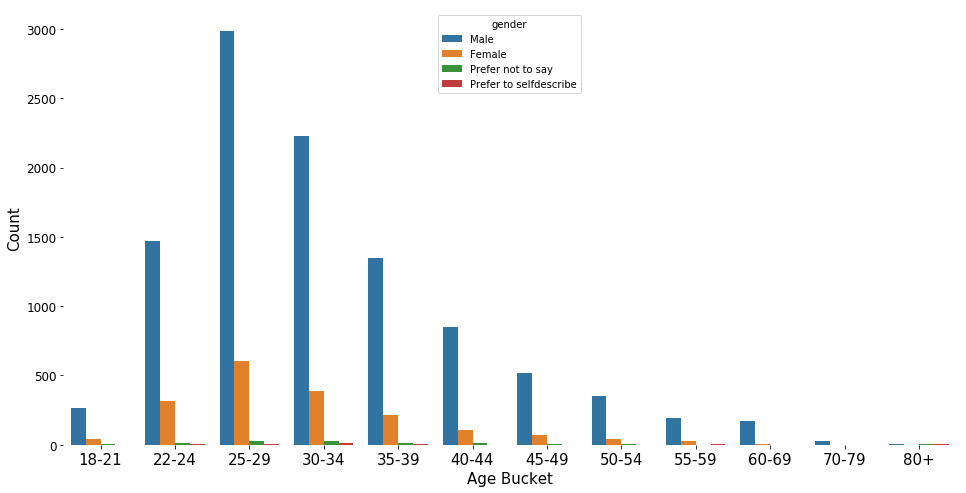

In [23]:
plt.figure(figsize = (16,8))
sns.countplot(df.age, hue = df.gender, dodge = True, order=['18-21','22-24','25-29','30-34','35-39','40-44',
                                                                           '45-49','50-54','55-59','60-69','70-79','80+'])
sns.despine(left=True, bottom=True)
plt.xticks(size=15)
plt.yticks(size=12)
plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

In [24]:
#w = {'Bachelors degree' : 0, 'Masters degree' : 1,'Doctoral degree':2,'Professional degree':3}                   
#df['deg'] = df['deg'].map(w)

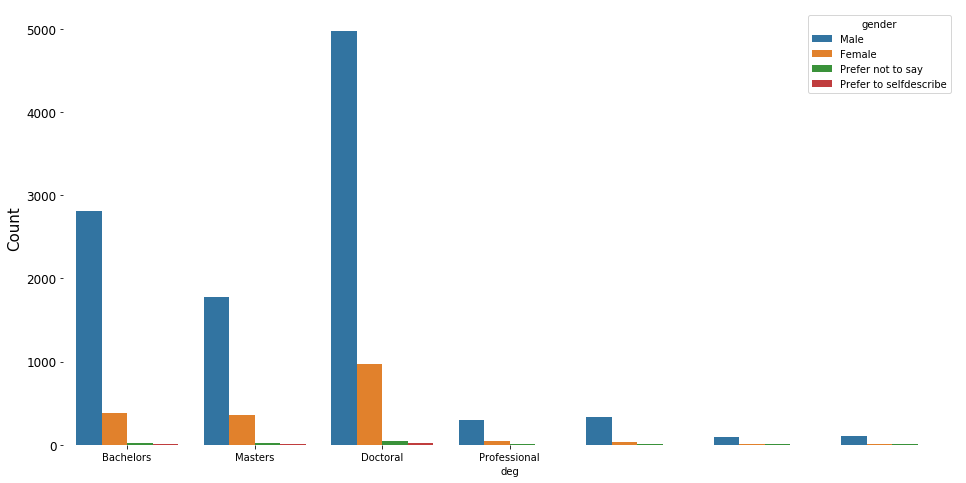

In [25]:
plt.figure(figsize = (16,8))
sns.countplot(df.deg, hue = df.gender, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Bachelors', 'Masters', 'Doctoral', 'Professional')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

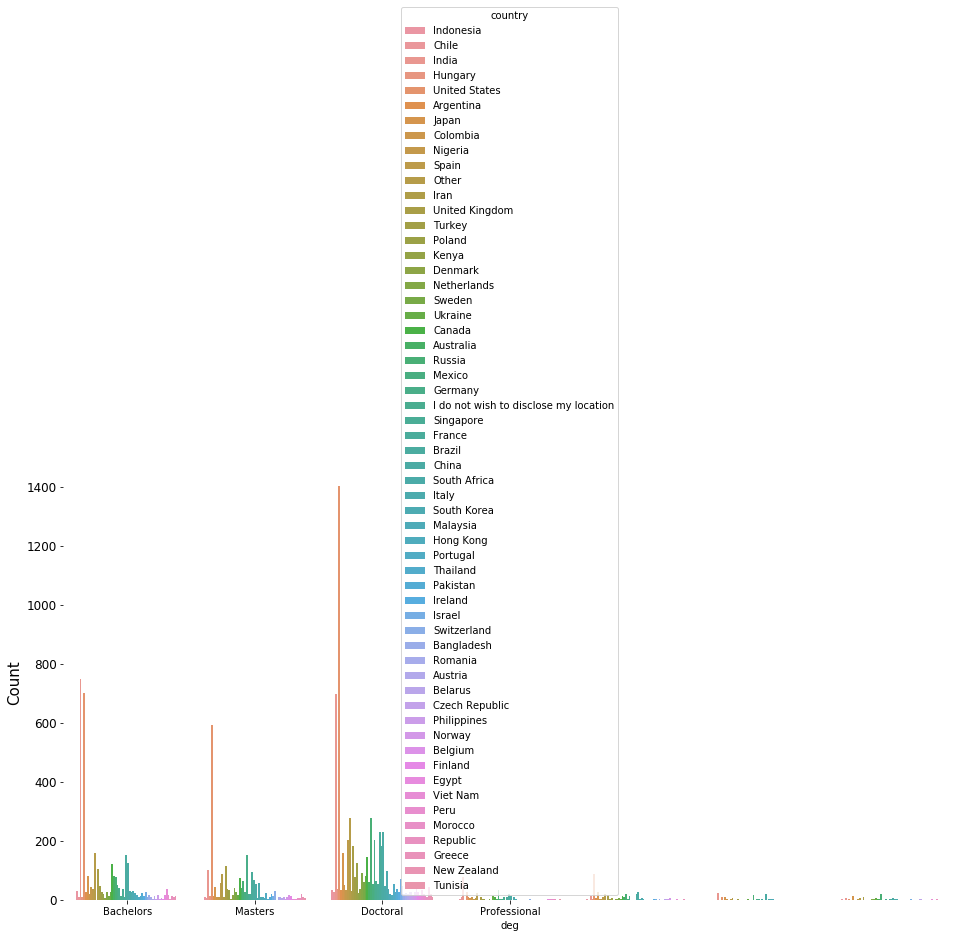

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(df.deg, hue = df.country, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Bachelors', 'Masters', 'Doctoral', 'Professional')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

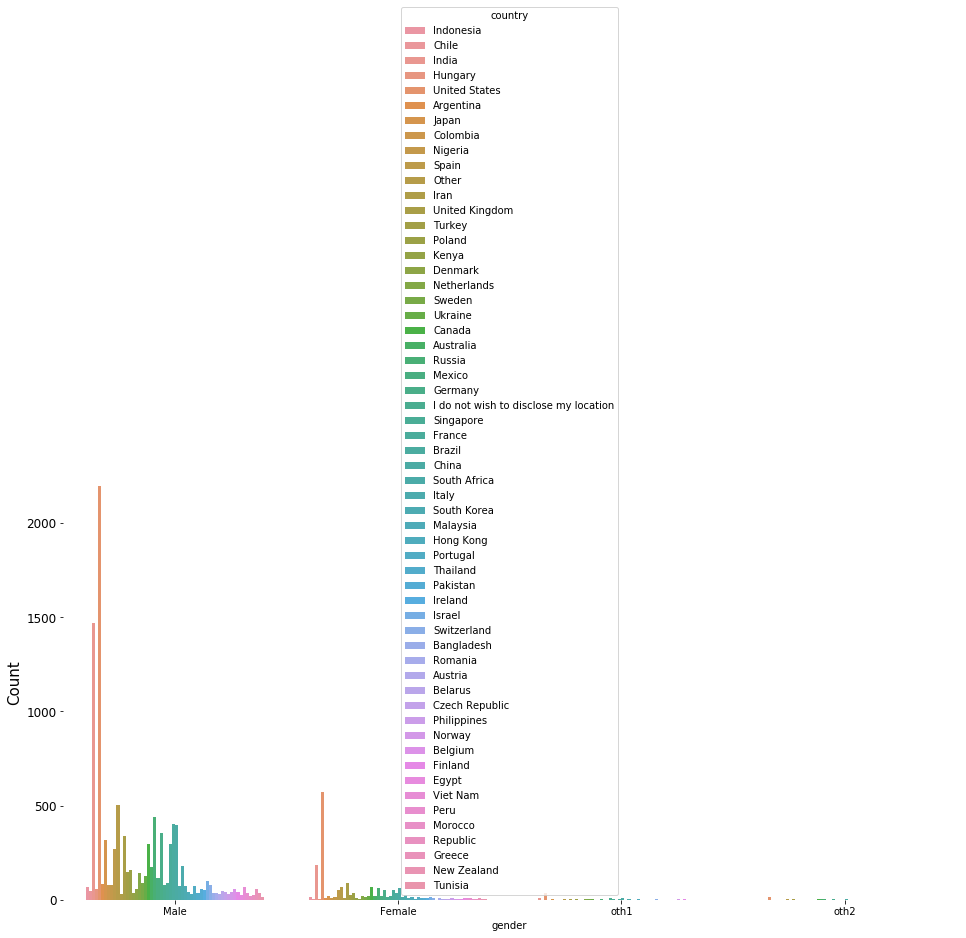

In [27]:
plt.figure(figsize = (16,8))
sns.countplot(df.gender, hue = df.country, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Male', 'Female', 'oth1', 'oth2')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

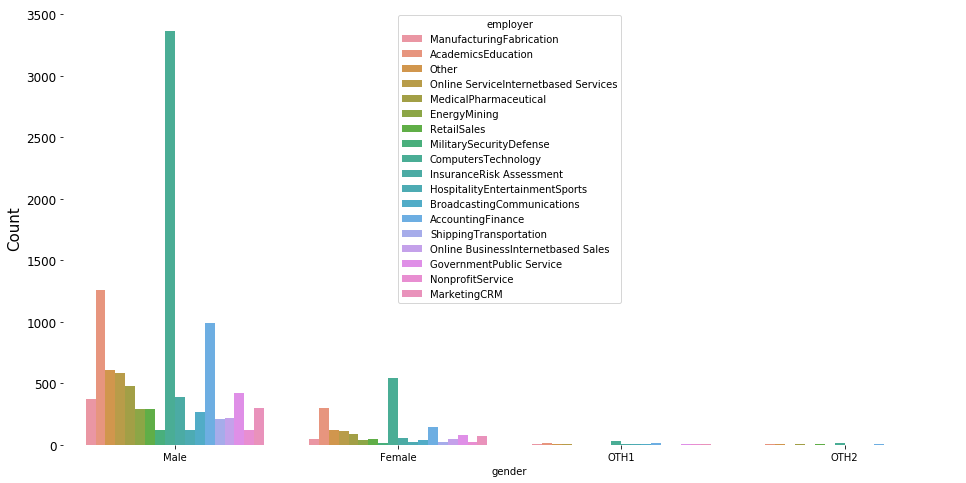

In [28]:
plt.figure(figsize = (16,8))
sns.countplot(df.gender, hue = df.employer, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Male', 'Female', 'OTH1', 'OTH2')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

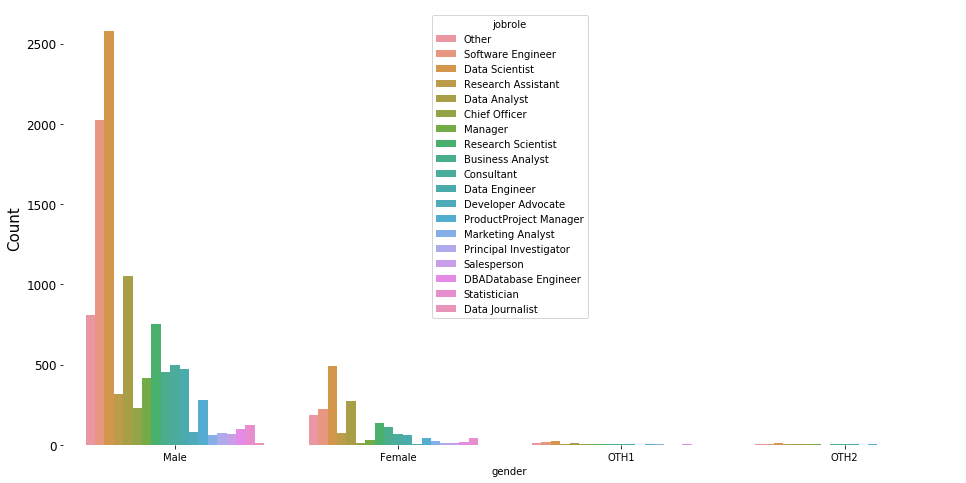

In [29]:
plt.figure(figsize = (16,8))
sns.countplot(df.gender, hue = df.jobrole, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Male', 'Female', 'OTH1', 'OTH2')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

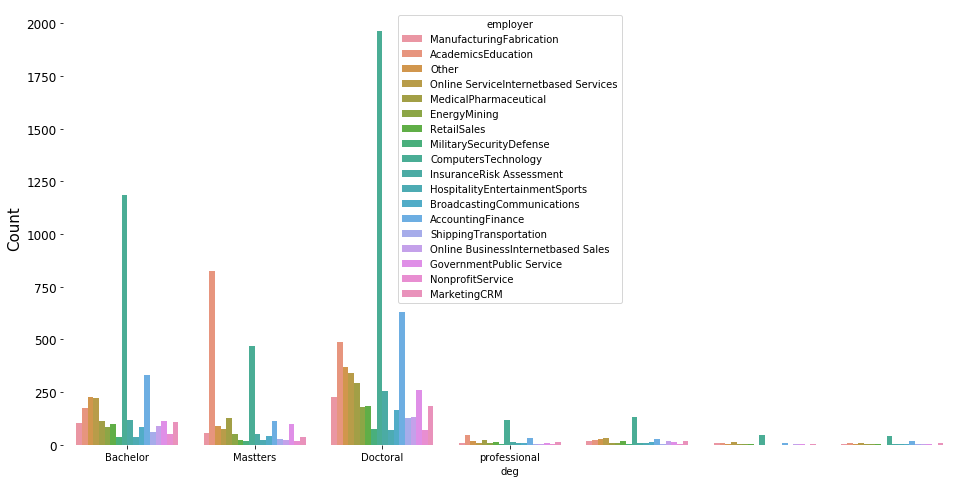

In [30]:
plt.figure(figsize = (16,8))
sns.countplot(df.deg, hue = df.employer, dodge = True)
sns.despine(left=True, bottom=True)
objects = ('Bachelor', 'Mastters', 'Doctoral', 'professional')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
#plt.xticks(size=15)
plt.yticks(size=12)
#plt.xlabel('Age Bucket', size=15)
plt.ylabel('Count', size=15)
plt.show()

In [33]:
w = {'Bachelors degree' : 1, 'Doctoral degree' : 2,'Masters degree':3,'Professional degree':4}                
df['deg'] = df['deg'].map(w)

In [34]:
sal1=df['sal'][:500]

In [35]:
deg1=df['deg'][:500]

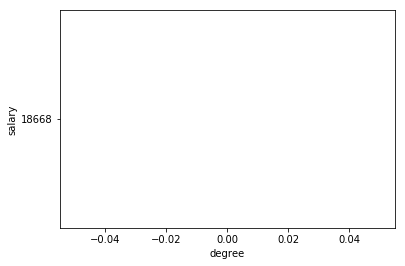

In [36]:

plt.xlabel('degree')
plt.ylabel('salary')

plt.scatter(deg1,sal1)
plt.show()

In [37]:
list1=df['age']

In [38]:
set(list1)

{'18-21',
 '22-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-69',
 '70-79',
 '80+'}

In [39]:
a = {'18-21':20,'22-24':23,'25-29':27,'30-34':32,'40-44':42,'45-49':47,'50-54':52,'60-69':65,'70-79':75,'80+':80}                
df['age'] = df['age'].map(a)

In [40]:
df['age'].fillna(df['age'].mean())

1        32.00000
4        31.64481
5        20.00000
6        32.00000
7        42.00000
9        27.00000
10       27.00000
11       27.00000
12       42.00000
13       27.00000
14       31.64481
15       31.64481
16       32.00000
17       32.00000
18       27.00000
19       32.00000
20       27.00000
21       32.00000
22       32.00000
23       42.00000
24       27.00000
25       32.00000
26       31.64481
27       27.00000
28       32.00000
29       23.00000
30       32.00000
31       23.00000
32       42.00000
33       27.00000
           ...   
15393    27.00000
15395    23.00000
15398    20.00000
15399    23.00000
15400    31.64481
15401    27.00000
15402    27.00000
15404    32.00000
15405    42.00000
15406    31.64481
15407    32.00000
15408    27.00000
15409    32.00000
15410    31.64481
15411    27.00000
15412    31.64481
15413    32.00000
15414    27.00000
15415    42.00000
15416    23.00000
15417    27.00000
15418    31.64481
15419    27.00000
15420    20.00000
15421    2

In [41]:
age1=df['age'][:500]

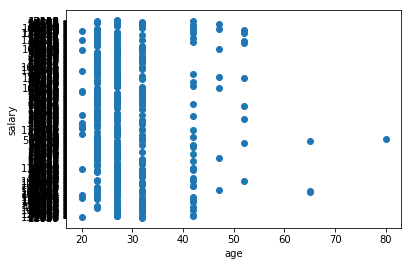

In [42]:
plt.xlabel('age')
plt.ylabel('salary')

plt.scatter(age1,sal1)
plt.show()

In [43]:
df.columns.values

array(['index', 'time', 'gender', 'Q1_OTHER_TEXT', 'country', 'deg',
       'major', 'jobrole', 'Q6_OTHER_TEXT', 'employer', 'Q7_OTHER_TEXT',
       'exp', 'sal', 'ml', 'Q11_OTHER_TEXT', 'Q12_Part_1_TEXT',
       'Q12_Part_2_TEXT', 'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT',
       'Q12_Part_5_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT',
       'Q14_OTHER_TEXT', 'Q15_OTHER_TEXT', 'Q16_OTHER_TEXT',
       'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT',
       'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q22_OTHER_TEXT',
       'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT',
       'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER', 'Q33_OTHER_TEXT',
       'Q34_OTHER_TEXT', 'Q35_OTHER_TEXT', 'Q36_OTHER_TEXT',
       'Q37_OTHER_TEXT', 'Q38_OTHER_TEXT', 'Q42_OTHER_TEXT',
       'Q49_OTHER_TEXT', 'Q50_OTHER_TEXT', 'index', 'age'], dtype=object)

In [44]:
df1 = df[['gender','country','deg','major','jobrole','employer','exp','sal','ml','age']]

In [45]:
df1

,gender,country,deg,major,jobrole,employer,exp,sal,ml,age
1,Male,Indonesia,NaN,Engineering,Other,ManufacturingFabrication,05Oct,18668,No we do not use ML methods,32.0
4,Male,Chile,NaN,Information technology,Other,AcademicsEducation,Oct15,11957,No we do not use ML methods,NaN
5,Male,India,NaN,Information technology,Other,Other,01,2696,We recently started using ML methods ie models...,20.0
6,Male,Hungary,NaN,Engineering,Software Engineer,Online ServiceInternetbased Services,03Apr,21152,We have well established ML methods ie models ...,32.0
7,Male,United States,NaN,Engineering,Data Scientist,Other,05Oct,132826,We recently started using ML methods ie models...,42.0
9,Male,United States,NaN,Mathematics,Research Assistant,AcademicsEducation,01Feb,35826,We are exploring ML methods and may one day pu...,27.0
10,Female,Argentina,NaN,A business discipline,Data Analyst,Other,01Feb,19903,We have well established ML methods ie models ...,27.0
11,Male,Japan,NaN,Engineering,Data Scientist,MedicalPharmaceutical,01,30633,We use ML methods for generating insights but ...,27.0
12,Male,Colombia,NaN,Environmental science,Data Scientist,EnergyMining,01Feb,51205,We are exploring ML methods and may one day pu...,42.0
13,Male,Nigeria,NaN,Medical,Other,RetailSales,02Mar,4803,No we do not use ML methods,27.0


In [46]:

df2=pd.DataFrame({col: df1[col].astype('category').cat.codes for col in df1}, index=df1.index)

In [47]:
df2

,gender,country,deg,major,jobrole,employer,exp,sal,ml,age
1,1,22,-1,2,11,8,5,10637,1,3
4,1,8,-1,7,11,0,10,10374,1,-1
5,1,21,-1,7,11,15,0,10830,4,0
6,1,19,-1,2,17,14,3,10703,3,3
7,1,56,-1,2,7,15,5,10438,4,4
9,1,56,-1,8,14,0,1,11021,2,2
10,0,0,-1,0,4,15,1,10681,3,2
11,1,27,-1,2,7,10,0,10922,5,2
12,1,10,-1,3,7,4,1,11276,2,4
13,1,34,-1,9,11,16,2,11231,1,2


In [48]:
df2.to_csv('final.csv')

In [49]:
df3=pd.read_csv('final.csv')

In [50]:
df3

,Unnamed: 0,gender,country,deg,major,jobrole,employer,exp,sal,ml,age
0,1,1,22,-1,2,11,8,5,10637,1,3
1,4,1,8,-1,7,11,0,10,10374,1,-1
2,5,1,21,-1,7,11,15,0,10830,4,0
3,6,1,19,-1,2,17,14,3,10703,3,3
4,7,1,56,-1,2,7,15,5,10438,4,4
5,9,1,56,-1,8,14,0,1,11021,2,2
6,10,0,0,-1,0,4,15,1,10681,3,2
7,11,1,27,-1,2,7,10,0,10922,5,2
8,12,1,10,-1,3,7,4,1,11276,2,4
9,13,1,34,-1,9,11,16,2,11231,1,2


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [52]:
df3.describe()

,Unnamed: 0,gender,country,deg,major,jobrole,employer,exp,sal,ml,age
count,12364.000000,12364.000000,12364.000000,12364.0,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000
mean,7584.441766,0.868651,33.609269,-1.0,3.889841,9.342284,5.744500,3.104982,5854.821013,2.597299,2.106438
std,4393.052515,0.389821,18.441110,0.0,3.889624,5.419366,5.171584,2.965898,3428.365757,1.470736,1.874660
min,1.000000,0.000000,0.000000,-1.0,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000
25%,3782.750000,1.000000,20.000000,-1.0,1.000000,5.000000,3.000000,1.000000,2868.750000,1.000000,1.000000
50%,7533.500000,1.000000,34.000000,-1.0,2.000000,7.000000,3.000000,2.000000,5816.500000,2.000000,2.000000
75%,11298.500000,1.000000,55.000000,-1.0,8.000000,15.000000,10.000000,5.000000,8829.250000,4.000000,3.000000
max,15429.000000,3.000000,57.000000,-1.0,12.000000,18.000000,17.000000,10.000000,11837.000000,5.000000,9.000000


In [53]:
df3['age'].corr(df3['sal'])

0.10259977453643439

In [54]:
df3['jobrole'].corr(df3['sal'])

-0.07707639497771088

In [55]:
df3['deg'].corr(df3['sal'])

nan

In [56]:
df3['country'].corr(df3['sal'])

0.19379562603080777

In [57]:
data=df3

In [58]:
y = data.sal

In [59]:
X_train, X_test, Y_train, y_test = train_test_split(data, y, test_size=0.6)
print( X_train.shape, Y_train.shape)
print (X_test.shape, y_test.shape)

(4945, 11) (4945,)
(7419, 11) (7419,)


In [80]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('Logistic',  LogisticRegression()))
models_list.append(('KNN', KNeighborsClassifier()))

In [81]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.005054 (0.003032) (run time: 54.341108)
SVM: 0.003841 (0.002109) (run time: 2092.522685)
Logistic: 0.003437 (0.001818) (run time: 3192.509601)
KNN: 0.002022 (0.001566) (run time: 1.357078)


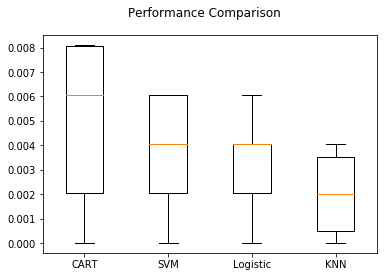

In [82]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print( results.mean(), results.std())

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import KNeighborsClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print( results.mean(), results.std())

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeClassifier()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print( results.mean(), results.std())

In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import SVC

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = SVC()
scoring = 'r2'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print( results.mean(), results.std())